<a href="https://colab.research.google.com/github/JakeLi2001/EverUp-Micro-Credential-Data-Analytics/blob/main/Python/Unit3_Mini_Project_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(37526, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df.shape

(682, 5)

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
37280,2022-01-07,New York,36,3966952,59827
37336,2022-01-08,New York,36,4057084,59913
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428


In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
#total number of cases
ny_df['cases'].max()

4244155

In [ ]:
# not a correct way of calculating total count because data is cumulative
ny_df['cases'].sum()

944941057

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  print(newcase_count)

1
0
1
9
11
22
45
17
36
31
44
109
95
189
122
218
425
1012
1774
2952
3258
4817
5711
4805
7413
5941
5688
8771
6266
7721
8707
8153
8996
10329
12274
8122
9304
8314
9568
10765
10794
10160
8435
6548
7402
11755
8631
7532
7249
6199
4867
4324
5659
6341
8286
10683
6013
4077
3285
4718
4702
3879
4559
3699
2524
2302
2746
3526
2873
2715
2138
1610
1438
2123
2364
2759
2185
1901
1241
1479
1478
2078
1678
1754
1601
1279
1044
1132
1758
1549
1363
1104
945
1361
1043
1053
1042
1083
777
712
690
664
724
821
912
694
623
630
561
626
794
707
665
555
598
575
738
804
697
624
391
458
628
872
919
725
536
516
590
691
588
790
727
679
559
913
834
767
778
752
509
519
855
706
810
758
748
532
613
535
711
779
642
754
531
542
746
639
694
720
706
513
478
667
706
736
724
738
609
410
662
626
599
707
651
581
404
629
568
789
635
635
709
649
757
710
888
863
799
729
525
557
573
756
861
849
725
586
767
653
893
793
983
865
575
751
666
953
909
1006
868
836
1188
1005
1383
1601
1728
1226
937
1394
1356
1835
1593
1448
1143
1032
1391
1235
1

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [ ]:
ny_df['new_cases'].sum()

4244155

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

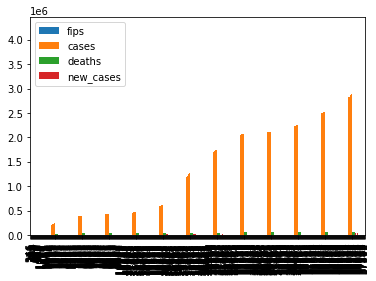

In [ ]:
ny_df.plot(kind='bar')

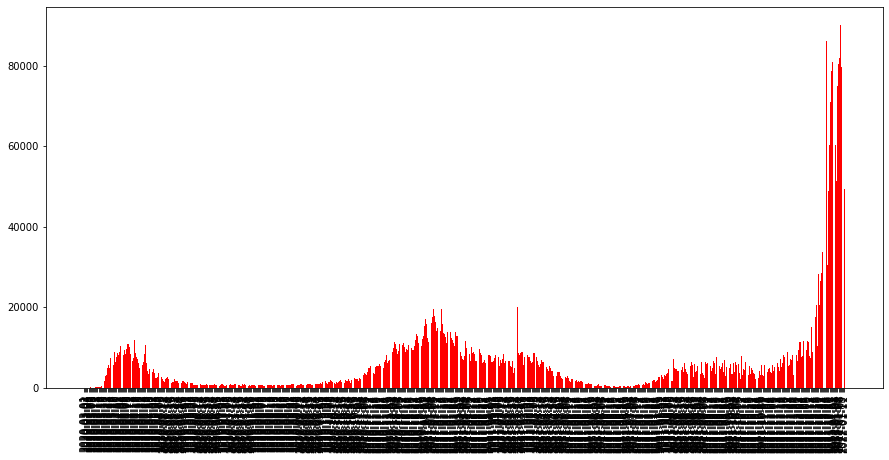

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

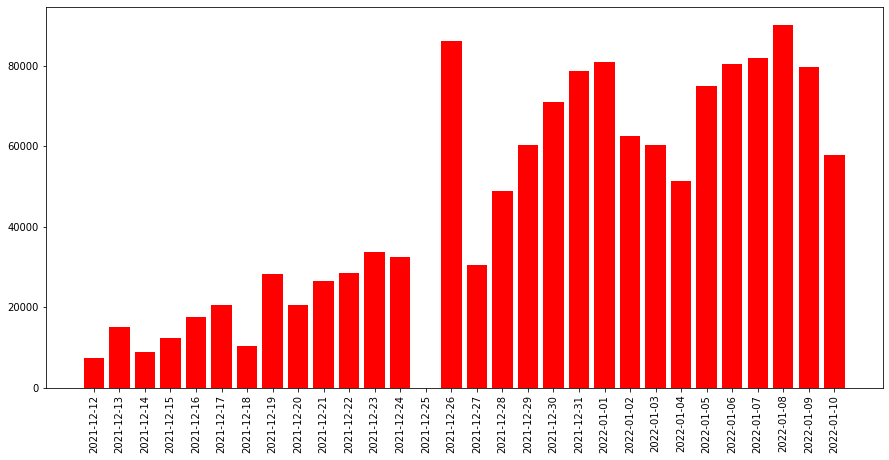

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

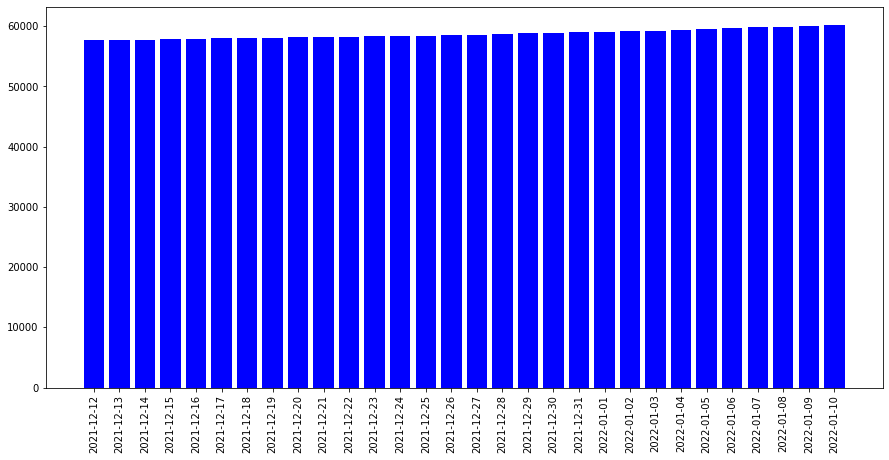

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after November for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California', 'Florida', 'Texas', 'Arizona']

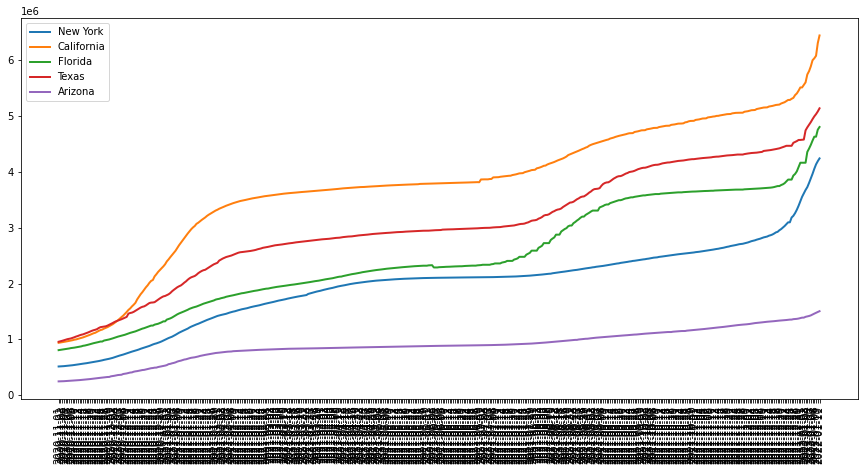

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     -- In the bar graph for New York, we can see that there are 3 COVID waves. Each wave is caused by alpha, delta, and most recently, omicron. 
2.   Conclusion 2
     -- After 2020-11-01, California has the most covid cases followed by Texas, Florida, New York, and Arizona.
